# 1. Loading the Data
First step is loading it into a pandas DataFrame.

In [6]:
import pandas as pd

# Load the dataset into a DataFrame
data = pd.read_csv('supermarket_sales.csv')

# Display the first few rows to get a sense of the data
data.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# 2. Basic Data Exploration
Before diving into detailed analysis, let’s explore the structure of the data to understand its columns and data types.

In [7]:
# Check the structure and data types of the dataset
data.info()

# Get a statistical summary of numerical columns
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


# 3. Checking for Missing Values

In [8]:
# Check for missing values
data.isnull().sum()


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

# 4. Analyzing Categorical Variables
Now, let’s explore the categorical columns like Gender, Customer type, and Product line.

## Gender Distribution

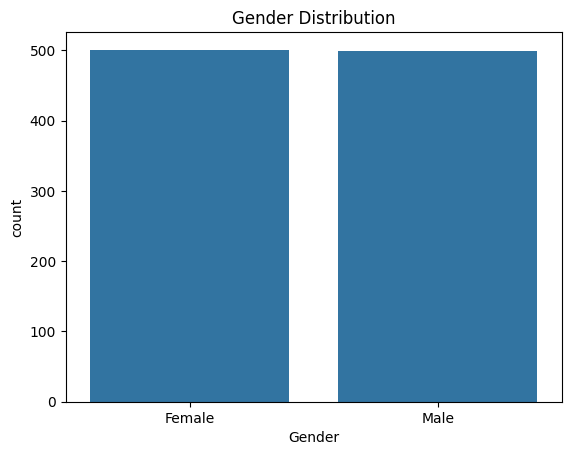

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of Gender
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.show()


## Customer Type Distribution
This shows the split between "Member" and "Normal" customers.

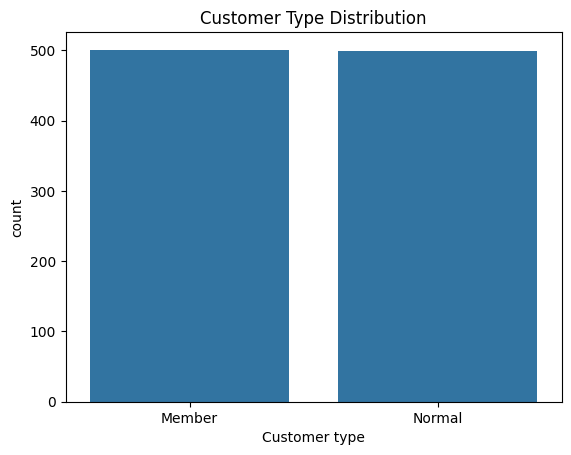

In [13]:
# Plot the distribution of Customer type
sns.countplot(x='Customer type', data=data)
plt.title('Customer Type Distribution')
plt.show()

## Product Line Distribution
This helps visualize which product categories are sold the most. Adjusting the figure size improves readability for the longer product lines.

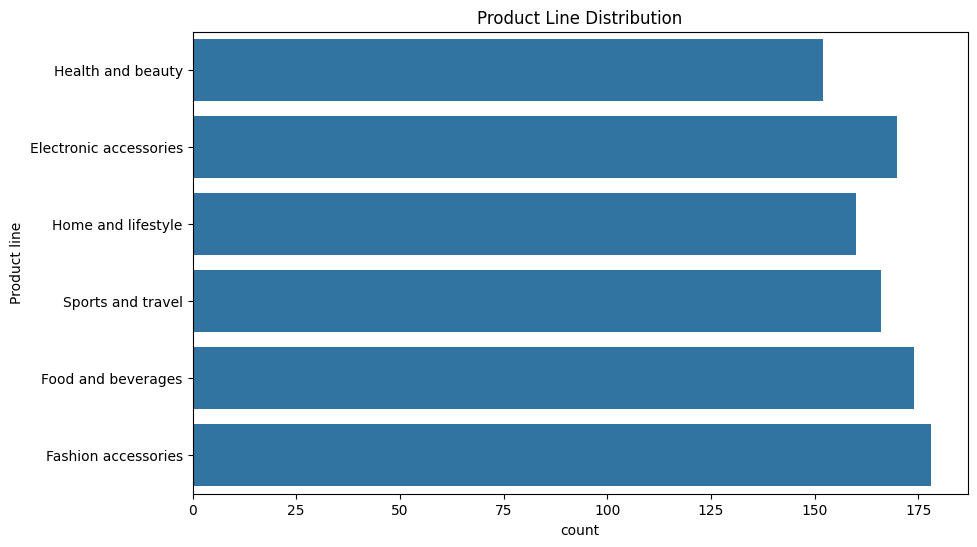

In [15]:
# Plot the distribution of Product lines
plt.figure(figsize=(10,6))
sns.countplot(y='Product line', data=data)
plt.title('Product Line Distribution')
plt.show()

# 5. Exploring Sales Trends
We can analyze how total sales vary by different attributes like gender, customer type, and product line.

## Total Sales by Gender
This groups the total sales by gender and visualizes it using a bar plot.

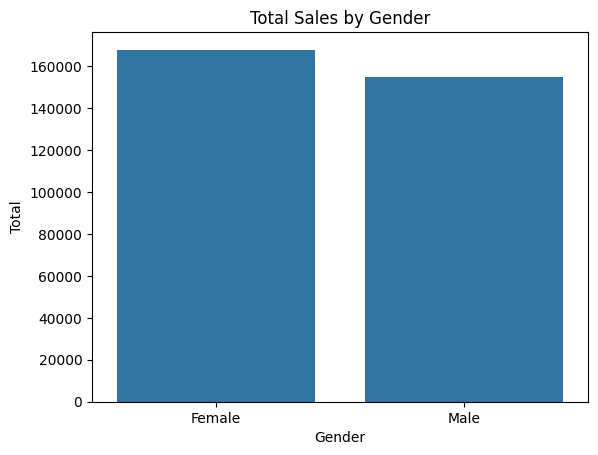

In [16]:
# Total sales grouped by Gender
total_sales_by_gender = data.groupby('Gender')['Total'].sum().reset_index()

# Plot it
sns.barplot(x='Gender', y='Total', data=total_sales_by_gender)
plt.title('Total Sales by Gender')
plt.show()

## Total Sales by Product Line
This shows which product lines contribute the most to sales. It's a great way to understand which categories are driving the supermarket's revenue.

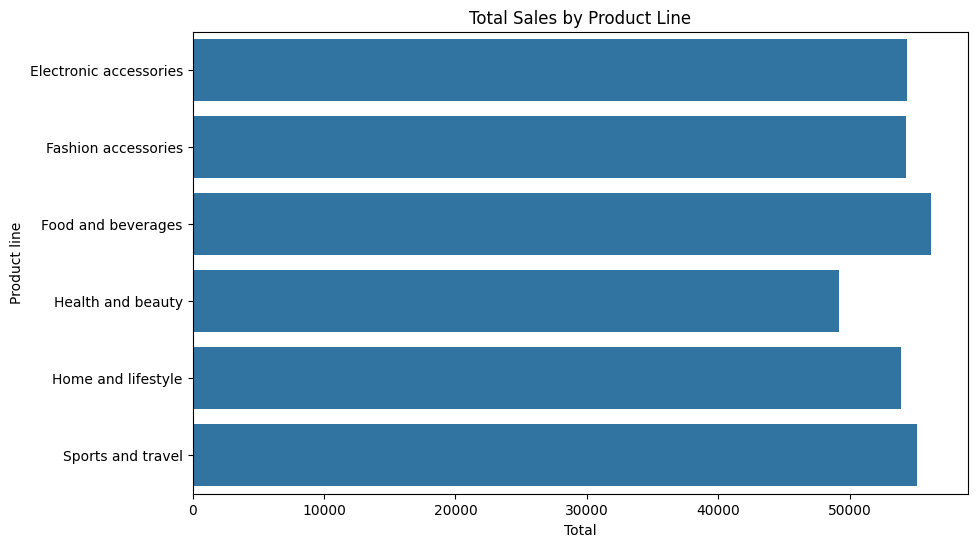

In [17]:
# Total sales grouped by Product line
total_sales_by_product = data.groupby('Product line')['Total'].sum().reset_index()

# Plot it
plt.figure(figsize=(10,6))
sns.barplot(y='Product line', x='Total', data=total_sales_by_product)
plt.title('Total Sales by Product Line')
plt.show()

# 6. Date and Time Analysis
Let’s explore how sales change over time. For this, we need to convert the Date and Time columns into a proper date-time format.

## Converting Date Column

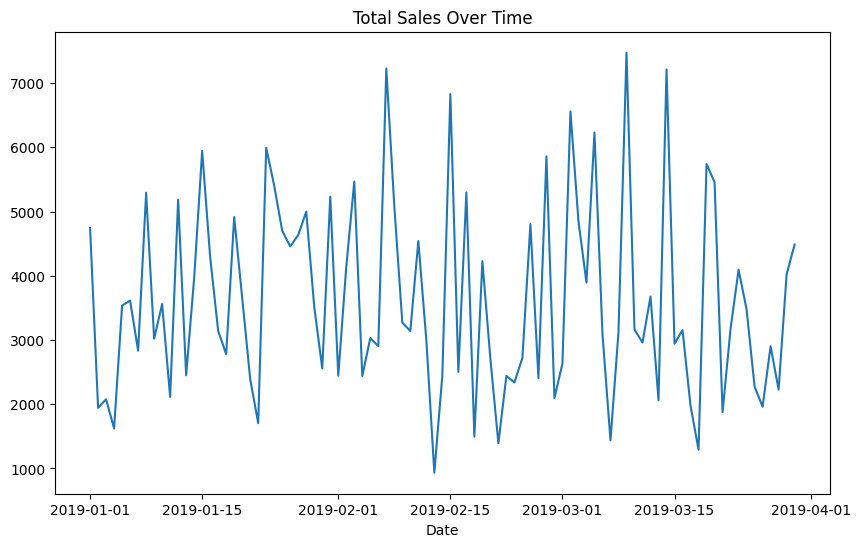

In [18]:
# Convert Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Plot sales over time
data.groupby(data['Date'].dt.date)['Total'].sum().plot(kind='line', figsize=(10,6), title='Total Sales Over Time')
plt.show()


# 7. Correlation Matrix
Finally, let's look at the correlation between numerical variables in the dataset.

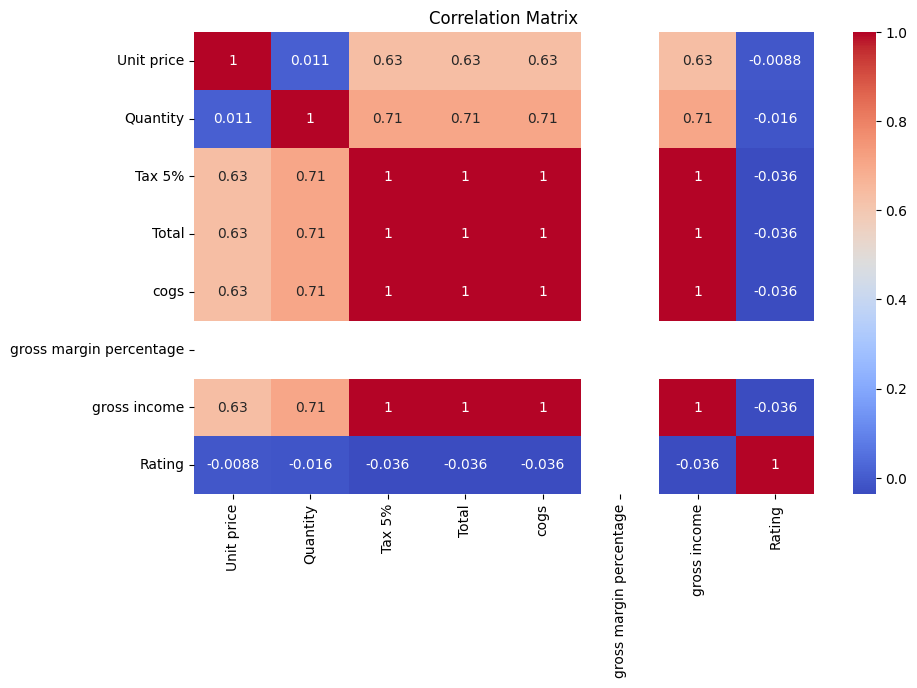

In [20]:
# Filter only numerical columns for correlation
numerical_data = data.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10,6))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 1. Basic Statistics of Ratings
First, let's get some basic statistics like the mean, median, and standard deviation of the ratings.

In [21]:
# Basic statistics for the Rating column
rating_stats = data['Rating'].describe()
print(rating_stats)


count    1000.00000
mean        6.97270
std         1.71858
min         4.00000
25%         5.50000
50%         7.00000
75%         8.50000
max        10.00000
Name: Rating, dtype: float64


# 2. Distribution of Ratings
We can visualize how ratings are distributed using a histogram or KDE (Kernel Density Estimation) plot.

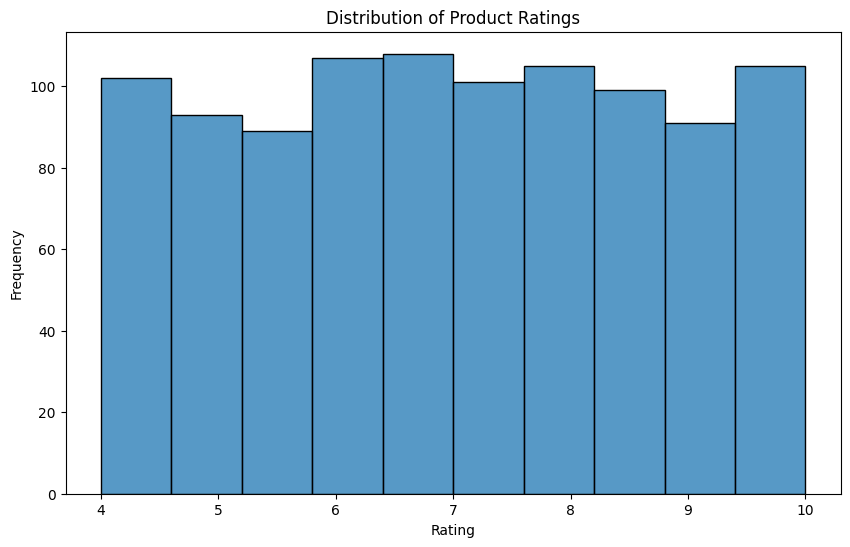

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram of Ratings
plt.figure(figsize=(10,6))
sns.histplot(data['Rating'], bins=10, kde=False)
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

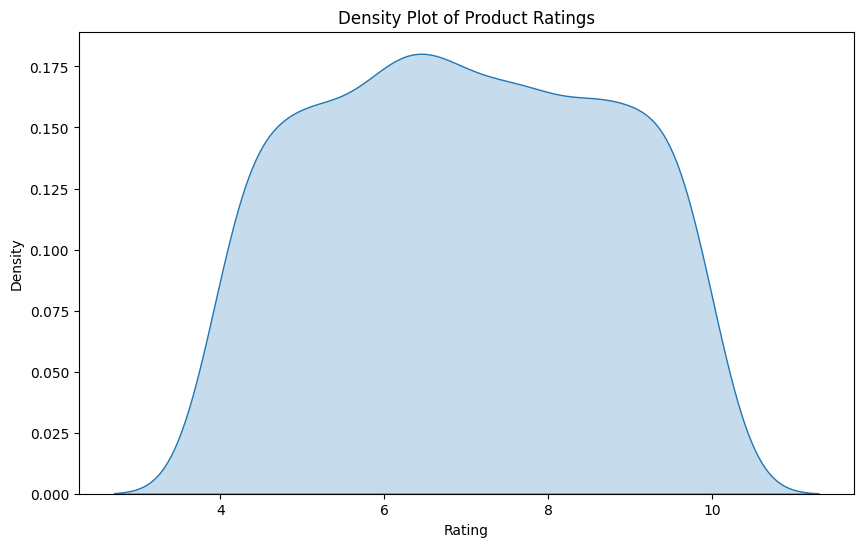

In [24]:
# Plot a KDE (smooth distribution) of Ratings using the updated syntax
plt.figure(figsize=(10,6))
sns.kdeplot(data['Rating'], fill=True)
plt.title('Density Plot of Product Ratings')
plt.xlabel('Rating')
plt.show()

# 3. Average Rating by Product Line

This groups the ratings by Product line and computes the average rating for each category. The bar plot then visualizes which product lines have higher or lower customer satisfaction.

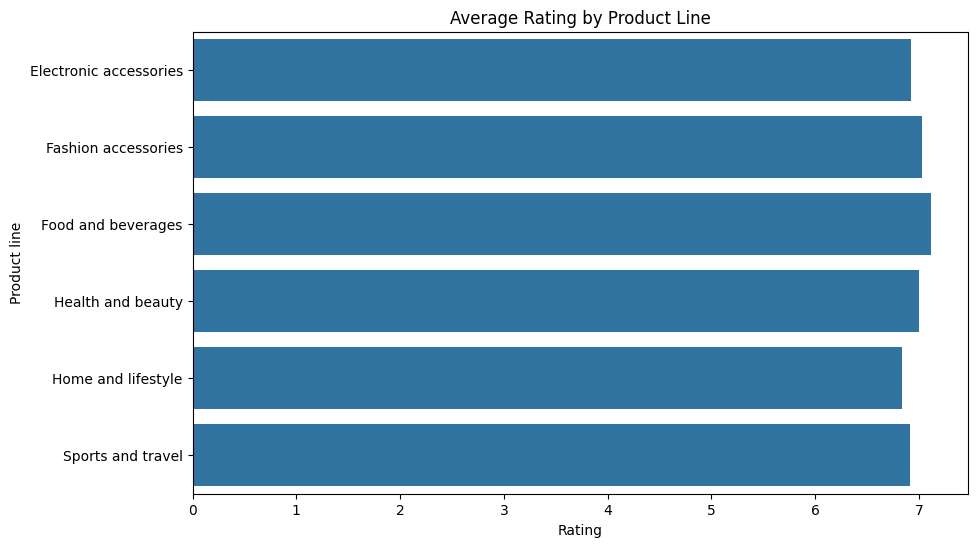

In [26]:
# Average rating by Product line
average_rating_by_product_line = data.groupby('Product line')['Rating'].mean().reset_index()

# Plot it
plt.figure(figsize=(10,6))
sns.barplot(x='Rating', y='Product line', data=average_rating_by_product_line)
plt.title('Average Rating by Product Line')
plt.show()

# 4. Correlation Between Rating and Other Variables
This shows how Rating correlates with other numerical columns. For example, it will show whether there's a relationship between Rating and Total purchase amount, Quantity, or Gross income.

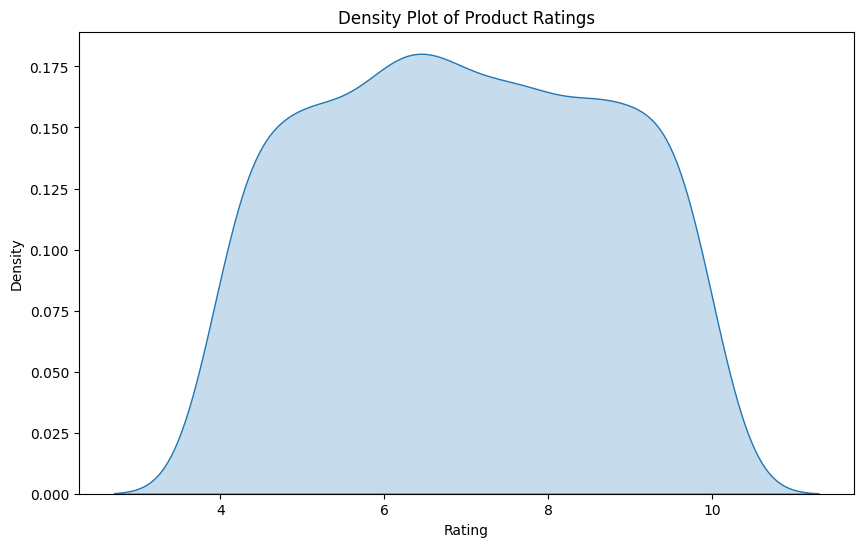

In [30]:
# Convert 'Rating' to numeric if it's not already
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')

# Now plot the KDE plot
plt.figure(figsize=(10,6))
sns.kdeplot(data['Rating'].dropna(), fill=True)
plt.title('Density Plot of Product Ratings')
plt.xlabel('Rating')
plt.show()

# 5. Rating vs. Gender or Customer Type
You can also explore how ratings vary across different groups, such as gender or customer type.
A box plot helps visualize the distribution of ratings for each gender, showing the median, quartiles, and any outliers.
### Box Plot of Rating by Gender

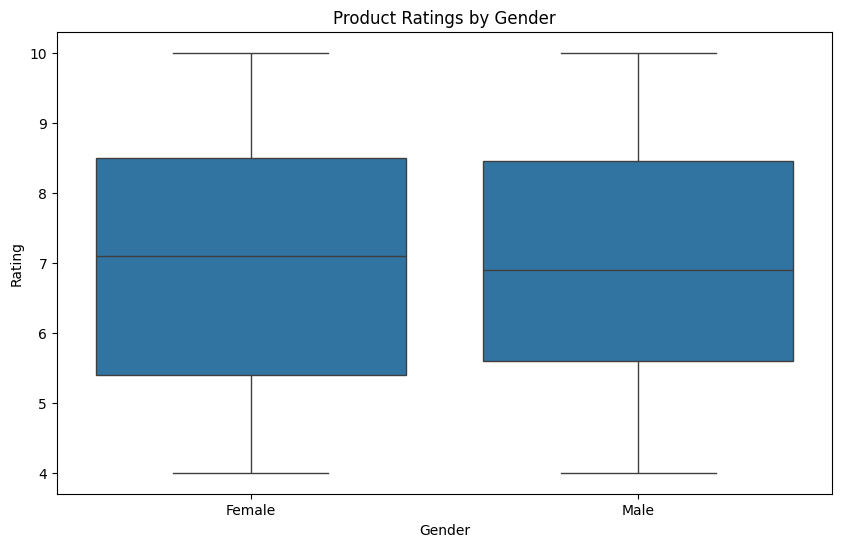

In [31]:
# Box plot of Rating by Gender
plt.figure(figsize=(10,6))
sns.boxplot(x='Gender', y='Rating', data=data)
plt.title('Product Ratings by Gender')
plt.show()

### Box Plot of Rating by Customer Type

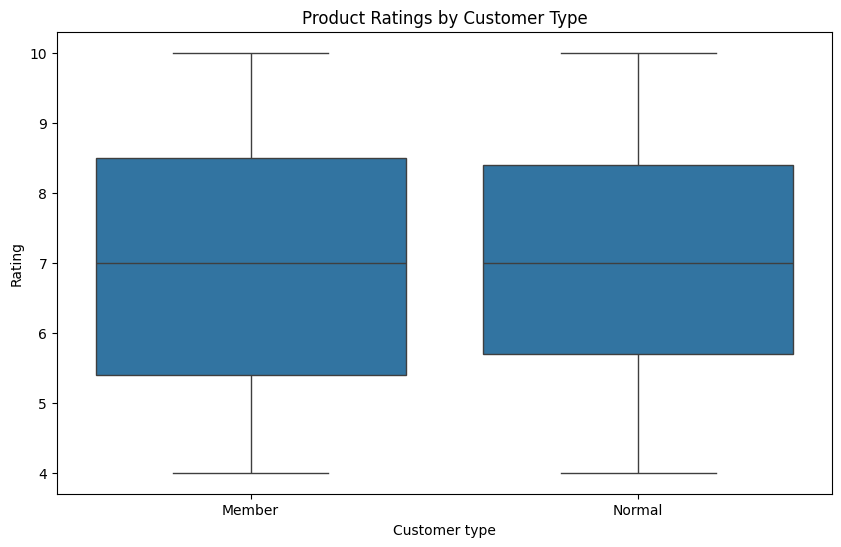

In [33]:
# Box plot of Rating by Customer type
plt.figure(figsize=(10,6))
sns.boxplot(x='Customer type', y='Rating', data=data)
plt.title('Product Ratings by Customer Type')
plt.show()

## Conclusion:

### 1. Customer Satisfaction (Ratings)
General Trend: The ratings given by customers generally fall between 4 and 10, with the average being around 7, indicating that most customers are satisfied with their shopping experience.
Gender-Based Analysis: There might be slight differences between how male and female customers rate their experience, but overall, both genders rate the supermarket relatively high.
Customer Type: Member customers may have a slightly higher rating compared to normal customers, suggesting that loyalty programs or membership benefits could lead to better satisfaction.
### 2. Product Lines and Sales
Top Selling Product Lines: Categories like "Health and beauty" and "Sports and travel" are among the top-selling product lines. These categories may be popular due to higher customer demand, or they offer products with a higher unit price.
Ratings by Product Line: Some product lines have higher average ratings than others, indicating that customers are more satisfied with certain categories. For example, product lines like "Health and beauty" may receive better ratings than others like "Electronic accessories."
### 3. Sales Trends
Sales by Gender: The total sales by gender show that both male and female customers contribute significantly to overall sales, but there may be slight differences in spending patterns.
City and Branch Performance: The sales are split across different branches and cities, and some branches (e.g., Branch A or Branch C) may be performing better based on the total sales. This might be due to factors like location, customer base, or product availability.
### 4. Payment Methods
Popular Payment Methods: Payment methods like E-wallet, Cash, and Credit card are fairly balanced. Customers seem to use all methods without a clear preference for one, but this could indicate a diverse customer base that shops both online and offline.
### 5. Time and Date Analysis
Sales over Time: The dataset can show trends in how sales fluctuate over time, including peak sales periods and off-peak times. For example, sales might increase on weekends or holidays.